<h1 align="center">Houses prices</h1> 
<h5 align="center"> Kamel Chahbi </h5> 

****
In this project, we will predict the price of 500 houses in Ames, Lowa, United States. The following flowchart illustrates the steps that are executed to achieve that. 

![flowchart](https://raw.githubusercontent.com/epfl-extension-school/project-adsml19-c3-s9-4393-2391/master/house-prices/img/flowchart.png?token=AID7WSIHBA24BGLUOEBICV3AAJA4A)

> Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from collections import Counter, OrderedDict 
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error as mae
from sklearn.feature_selection import SelectKBest,f_regression, mutual_info_regression
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import RobustScaler
pd.options.mode.chained_assignment = None
np.seterr(divide='ignore', invalid='ignore')

pd.set_option('display.max_columns',500)

> Import the training data

In [2]:
df = pd.read_csv('house-prices.csv')
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,484,528275070,60,RL,NaN,8795,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,7,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,PConc,Gd,TA,No,GLQ,300.0,Unf,0.0,652.0,952.0,GasA,Ex,Y,SBrkr,980,1276,0,2256,0.0,0.0,2,1,4,1,Gd,8,Typ,1,TA,BuiltIn,2000.0,Fin,2.0,554.0,TA,TA,Y,224,54,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,236000
1,2586,535305120,20,RL,75.0,10170,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1951,1951,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,522.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,216.0,216.0,GasA,TA,Y,SBrkr,1575,0,0,1575,0.0,0.0,1,1,2,1,Gd,5,Typ,1,Gd,Attchd,1951.0,Unf,2.0,400.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal,155000
2,2289,923228250,160,RM,21.0,2001,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,MeadowV,Norm,Norm,Twnhs,2Story,4,5,1970,1970,Gable,CompShg,CemntBd,CmentBd,BrkFace,80.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,546.0,546.0,GasA,Fa,Y,SBrkr,546,546,0,1092,0.0,0.0,1,1,3,1,TA,6,Typ,0,NaN,Attchd,1970.0,Unf,1.0,286.0,TA,TA,Y,0,0,0,0,0,0,NaN,NaN,NaN,0,1,2007,WD,Normal,75000
3,142,535152150,20,RL,70.0,10552,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,5,1959,1959,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,1018.0,Unf,0.0,380.0,1398.0,GasA,Gd,Y,SBrkr,1700,0,0,1700,0.0,1.0,1,1,4,1,Gd,6,Typ,1,Gd,Attchd,1959.0,RFn,2.0,447.0,TA,TA,Y,0,38,0,0,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal,165500
4,2042,903475060,190,RM,60.0,10120,Pave,NaN,IR1,Bnk,AllPub,Inside,Gtl,OldTown,Feedr,Norm,2fmCon,2.5Unf,7,4,1910,1950,Hip,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,925.0,925.0,GasA,TA,N,FuseF,964,925,0,1889,0.0,0.0,1,1,4,2,TA,9,Typ,1,Gd,Detchd,1960.0,Unf,1.0,308.0,TA,TA,N,0,0,264,0,0,0,NaN,MnPrv,NaN,0,1,2007,WD,Normal,122000


> The training data are composed of 80 features and 2430 data points. The PID and Order columns are indexer and do not provide information about the houses,

In [3]:
df.shape

(2430, 82)

> We drop the PID and Order columns. 

In [4]:
df.drop(['Order','PID'],axis=1,inplace=True)

# EDA/Data cleaning

> Define the type of the features.

In [5]:
# continuous features
continuous = ['Lot Frontage','Lot Area','Mas Vnr Area','BsmtFin SF 1','BsmtFin SF 2','Bsmt Unf SF','Total Bsmt SF','1st Flr SF','2nd Flr SF','Low Qual Fin SF',
              'Gr Liv Area','Garage Area','Wood Deck SF','Open Porch SF','Enclosed Porch','3Ssn Porch','Screen Porch','Pool Area','Misc Val']
# discrete features
discrete = ['Year Built','Year Remod/Add','Bsmt Full Bath','Bsmt Half Bath','Full Bath','Half Bath','Bedroom AbvGr','Kitchen AbvGr','TotRms AbvGrd','Fireplaces','Garage Yr Blt',
            'Garage Cars','Mo Sold','Yr Sold']
# nominal features
nominal = ['MS Zoning','Street','Alley','Land Contour','Lot Config','Neighborhood','Condition 1','Condition 2','Bldg Type','House Style',
           'Roof Style','Roof Matl','Exterior 1st','Exterior 2nd','Mas Vnr Type','Foundation','Heating','Central Air','Garage Type','Misc Feature','Sale Type','Sale Condition']
# nominal features
ordinal = ['Lot Shape','Utilities','Land Slope','Overall Qual','Overall Cond','Exter Qual','Exter Cond','Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1',
           'BsmtFin Type 2','Electrical','Kitchen Qual','Functional','Fireplace Qu','Garage Finish','Garage Qual','Garage Cond','Paved Drive','Pool QC',
          'Fence','MS SubClass']
# features with meanignful nan values.
miss_me= ['Alley','Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2','Fireplace Qu','Garage Type','Garage Yr Blt','Garage Finish','Garage Qual','Garage Cond',
         'Pool QC','Fence','Misc Feature','Mas Vnr Type']

**Continuous Features**

> Continuous features overview

In [6]:
df_c = df[continuous].copy()
df_c.head()

,Lot Frontage,Lot Area,Mas Vnr Area,BsmtFin SF 1,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Garage Area,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val
0,NaN,8795,0.0,300.0,0.0,652.0,952.0,980,1276,0,2256,554.0,224,54,0,0,0,0,0
1,75.0,10170,522.0,0.0,0.0,216.0,216.0,1575,0,0,1575,400.0,0,0,0,0,0,0,0
2,21.0,2001,80.0,0.0,0.0,546.0,546.0,546,546,0,1092,286.0,0,0,0,0,0,0,0
3,70.0,10552,0.0,1018.0,0.0,380.0,1398.0,1700,0,0,1700,447.0,0,38,0,0,0,0,0
4,60.0,10120,0.0,0.0,0.0,925.0,925.0,964,925,0,1889,308.0,0,0,264,0,0,0,0


> **Continuous features missing values:**

In [7]:
df_c.isnull().sum()

Lot Frontage       420
Lot Area             0
Mas Vnr Area        20
BsmtFin SF 1         1
BsmtFin SF 2         1
Bsmt Unf SF          1
Total Bsmt SF        1
1st Flr SF           0
2nd Flr SF           0
Low Qual Fin SF      0
Gr Liv Area          0
Garage Area          1
Wood Deck SF         0
Open Porch SF        0
Enclosed Porch       0
3Ssn Porch           0
Screen Porch         0
Pool Area            0
Misc Val             0
dtype: int64

> **Distribution of each feature by the houses sale price**

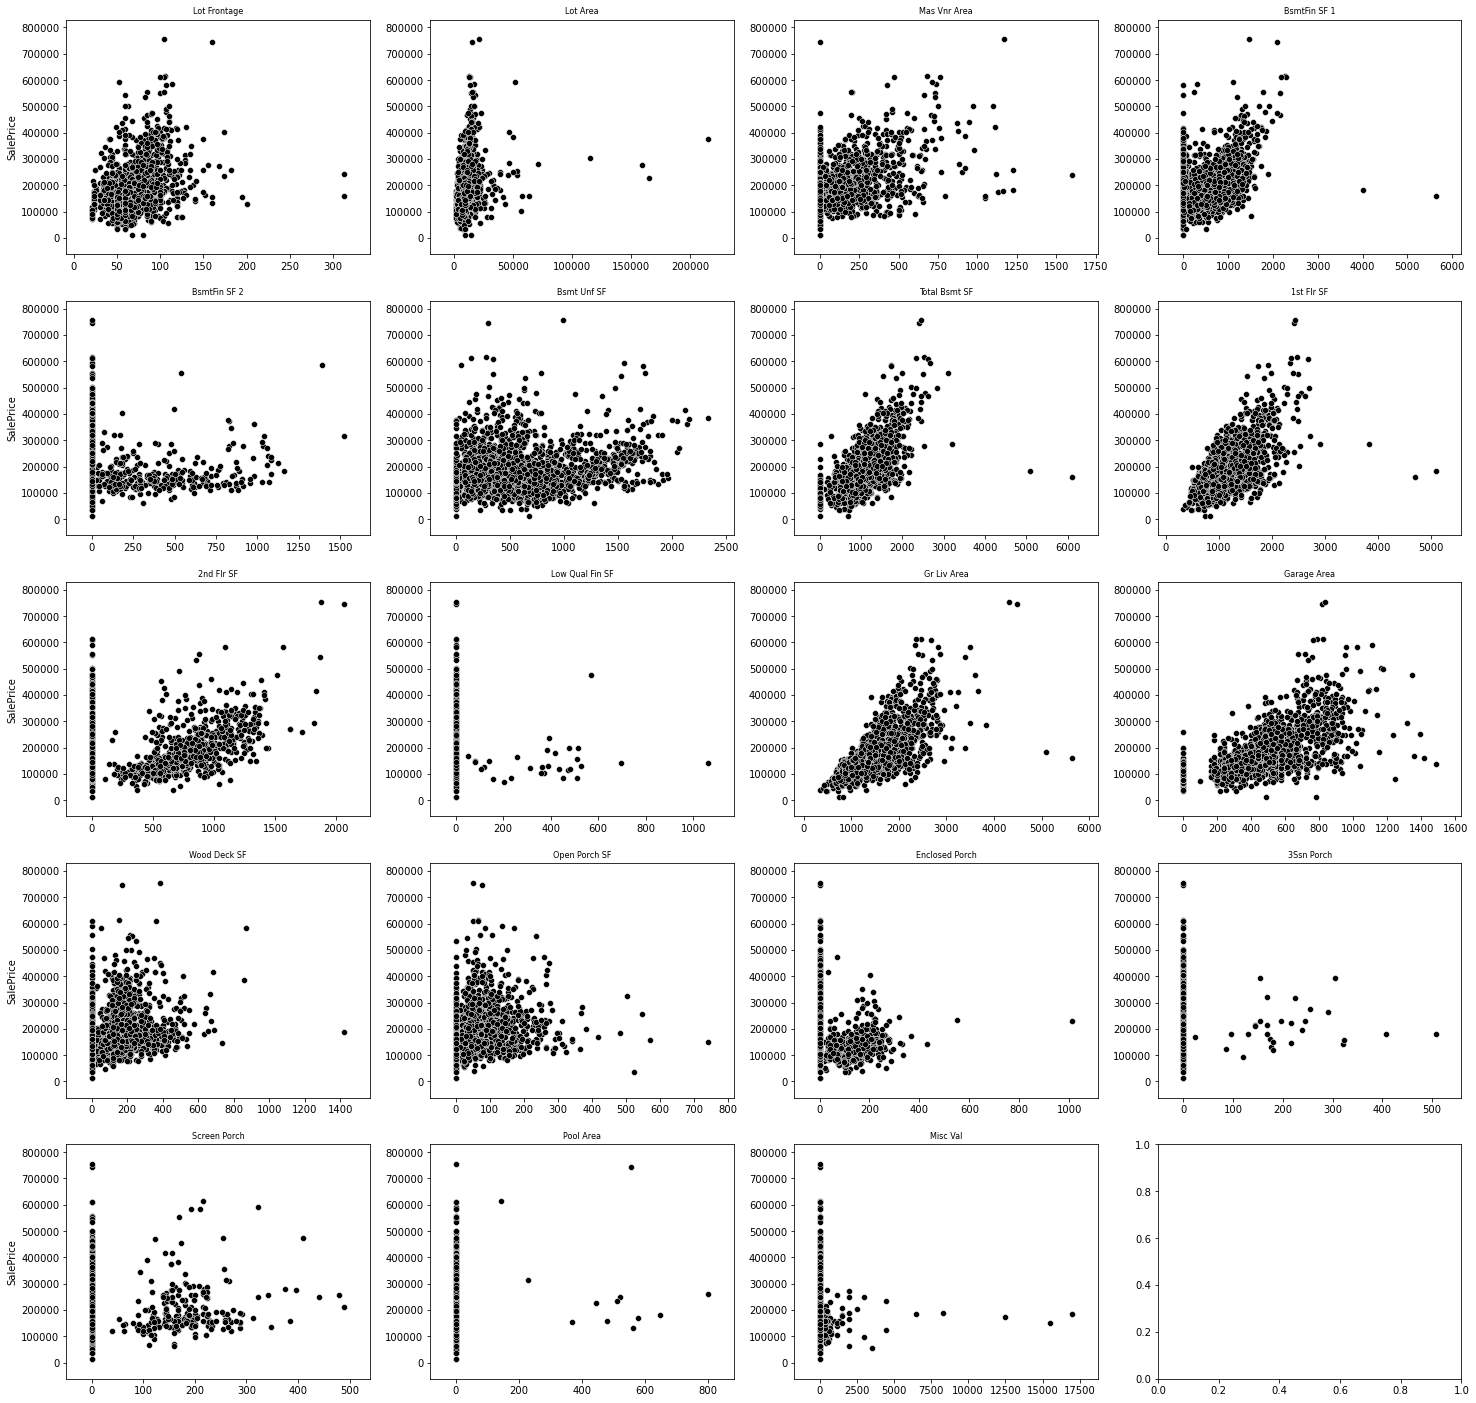

In [8]:
fig, axes = plt.subplots(
    5, 4,  gridspec_kw={"height_ratios": np.full(5, 1)}, figsize=(25,25)
)

i=0
for (feat, plot_col) in zip(
    df_c.columns, np.tile(np.arange(0,4,1),5)  # pairing feature with column in plot
    ):
        k=i
        ax = sns.scatterplot(x=feat, y=df['SalePrice'],data=df,color= 'black', ax=axes[k, plot_col])
        ax.margins(0.1)
        axes[k, plot_col].set_title(feat, fontsize=8)
        if plot_col > 0:
            axes[k, plot_col].set_ylabel("")
        if plot_col == 3:
            i+=1

for ax in axes.flatten():
    ax.set_xlabel("")

plt.show()

**Sale Price**

> Plot the distribution of sale price

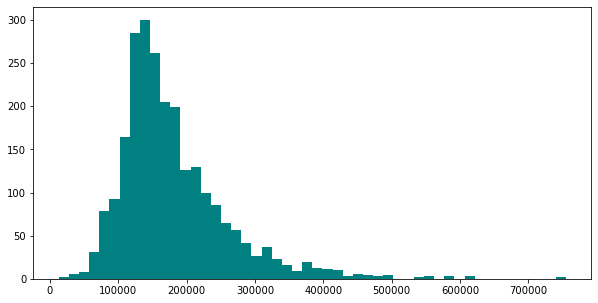

In [9]:
plt.figure(figsize=(10,5))
plt.hist(df['SalePrice'],bins=50,color='teal')
plt.show()

> The distribution of sale prices is right-skewed. When applying the log transformation we could see that the distribution follow a normal distribution, wich would helps bet

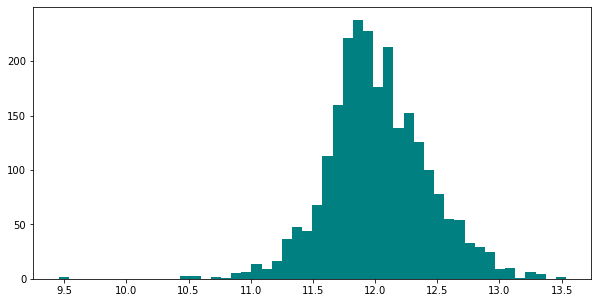

In [10]:
plt.figure(figsize=(10,5))
plt.hist(np.log(df['SalePrice']),bins=50,color='teal')
plt.show()

> Since we have a normal distibution we will use z score to remove outliers with respect to the sale price

In [11]:
Filter = np.abs(np.log(df['SalePrice']) - np.log(df['SalePrice']).mean()) > (3 * np.log(df['SalePrice']).std())
outliers = df.loc[Filter, :]
df.drop(outliers.index, axis=0, inplace=True)

**Lot Area**

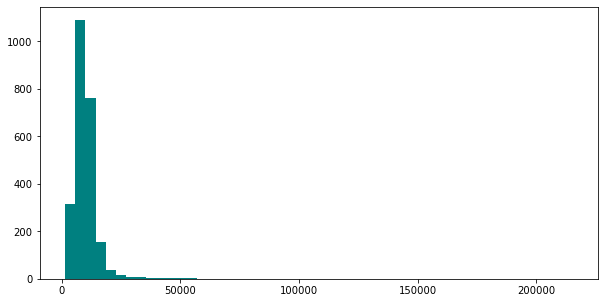

In [12]:
plt.figure(figsize=(10,5))
plt.hist(df['Lot Area'],bins=50,color='teal')
plt.show()

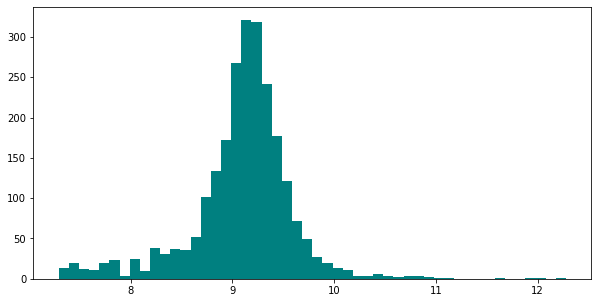

In [13]:
plt.figure(figsize=(10,5))
plt.hist(np.log(df['Lot Area']),bins=50,color='teal')
plt.show()

In [14]:
Filter = np.abs(np.log(df['Lot Area']) - np.log(df['Lot Area']).mean()) > (3 * np.log(df['Lot Area']).std())
outliers = df.loc[Filter, :]
df.drop(outliers.index, axis=0, inplace=True)

**Duplicated**

In [15]:
df[df.drop('SalePrice',axis=1).duplicated(keep=False)]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
403,160,FV,24.0,2544,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,Twnhs,2Story,7,5,2005,2005,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,600.0,600.0,GasA,Ex,Y,SBrkr,520,623,80,1223,0.0,0.0,2,1,2,1,Gd,4,Typ,0,NaN,Detchd,2005.0,RFn,2.0,480.0,TA,TA,Y,0,166,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,149900
941,160,RM,24.0,2522,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Twnhs,2Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,Stone,50.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,970.0,970.0,GasA,Ex,Y,SBrkr,970,739,0,1709,0.0,0.0,2,0,3,1,Gd,7,Maj1,0,NaN,Detchd,2004.0,Unf,2.0,380.0,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,134000
1297,160,FV,24.0,2544,Pave,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,Twnhs,2Story,7,5,2005,2005,Gable,CompShg,MetalSd,MetalSd,None,0.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,600.0,600.0,GasA,Ex,Y,SBrkr,520,623,80,1223,0.0,0.0,2,1,2,1,Gd,4,Typ,0,NaN,Detchd,2005.0,RFn,2.0,480.0,TA,TA,Y,0,166,0,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,147400
2077,160,RM,24.0,2522,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,Twnhs,2Story,7,5,2004,2004,Gable,CompShg,VinylSd,VinylSd,Stone,50.0,Gd,TA,PConc,Gd,TA,No,Unf,0.0,Unf,0.0,970.0,970.0,GasA,Ex,Y,SBrkr,970,739,0,1709,0.0,0.0,2,0,3,1,Gd,7,Maj1,0,NaN,Detchd,2004.0,Unf,2.0,380.0,TA,TA,Y,0,40,0,0,0,0,NaN,NaN,NaN,0,5,2006,WD,Normal,130000


In [16]:
Filter = df[df.drop('SalePrice',axis=1).duplicated()].index
df.drop(Filter,axis=0,inplace=True)

**Lot Frontage**

> In thisfeature we have 420 missing values that will be filled. We will see if there is any correlation between lot frontage and other numerical variables.

In [17]:
df.drop('Lot Frontage',axis=1).corrwith(df['Lot Frontage']).sort_values(ascending=False).head()

Lot Area         0.602423
1st Flr SF       0.384389
SalePrice        0.339685
Gr Liv Area      0.333608
TotRms AbvGrd    0.324308
dtype: float64

> From the results above we could see that there is a correlation between lot frontage and lot frontage area.

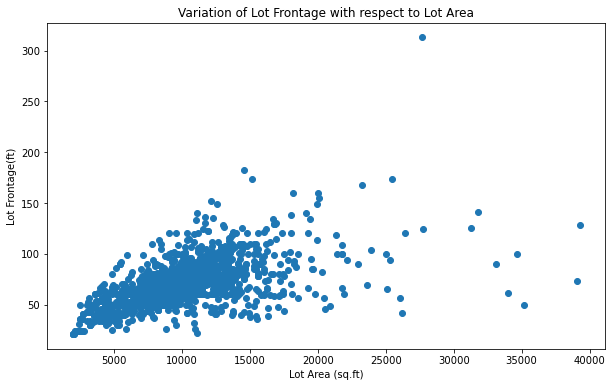

In [18]:
plt.figure(figsize=(10,6))
plt.scatter(df['Lot Area'], df['Lot Frontage'])
plt.title('Variation of Lot Frontage with respect to Lot Area')
plt.xlabel('Lot Area (sq.ft)')
plt.ylabel('Lot Frontage(ft)')
plt.show()

> We will predict the missing lot frontage values using their lot area.

In [19]:
y_lf = df['Lot Frontage'].dropna(axis=0)
x_lf = np.log(df.loc[y_lf.index,'Lot Area'])
coef = np.polyfit(x_lf, y_lf,1)
ypred_fl = np.polyval(coef,np.log(df['Lot Area']))

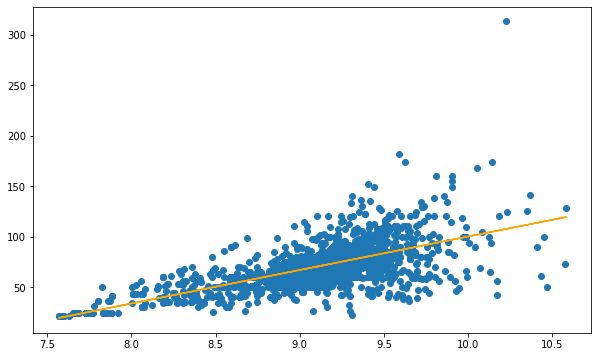

In [20]:
plt.figure(figsize=(10,6))
plt.scatter(x=np.log(df['Lot Area']), y=df['Lot Frontage'])
plt.plot(np.log(df['Lot Area']), ypred_fl,color='orange')

> Replace the higher lot frontage higher than 300.

In [21]:
df.loc[(df['Lot Frontage'] > 300), 'Lot Frontage'] = np.polyval(coef,np.log(df[df['Lot Frontage']>300]['Lot Area']))[0]

> Replacing the missing values 

In [22]:
ylfnull = df['Lot Frontage'][df['Lot Frontage'].isnull()]
df['Lot Frontage'].fillna(pd.Series(np.polyval(coef,np.log(df['Lot Area'][ylfnull.index])), index = ylfnull.index), inplace=True)

**Low Qual Fin SF**

> Most of the houses have non low quality finished surface. and the ones that have them have lower value axcept for one house with low quality surface and a values higher than 400,000$

In [23]:
df[(df['Low Qual Fin SF'] > 400)&(df['SalePrice'] > 400000)]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
647,75,RM,90.0,22950,Pave,NaN,IR2,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,2.5Fin,10,9,1892,1993,Gable,WdShngl,Wd Sdng,Wd Sdng,None,0.0,Gd,Gd,BrkTil,TA,TA,Mn,Unf,0.0,Unf,0.0,1107.0,1107.0,GasA,Ex,Y,SBrkr,1518,1518,572,3608,0.0,0.0,2,1,4,1,Ex,12,Typ,2,TA,Detchd,1993.0,Unf,3.0,840.0,Ex,TA,Y,0,260,0,0,410,0,NaN,GdPrv,NaN,0,6,2006,WD,Normal,475000


> The houses at that price range does not have low quality surface, hence we will replace that values with 0.

In [24]:
df.loc[(df['Low Qual Fin SF'] > 400)&(df['SalePrice'] > 400000),'Low Qual Fin SF'] = 0

**Wood Deck SF**

> The wood Deck surface higher for most of the houses are between 0 to 800 with one house exception with wood deck area higher than 1400.

In [25]:
df[(df['Wood Deck SF'] > 1400)]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
283,80,RL,89.284438,15957,Pave,NaN,IR1,Low,AllPub,Corner,Mod,Mitchel,Norm,Norm,1Fam,SLvl,6,6,1977,1977,Gable,CompShg,HdBoard,Plywood,None,0.0,TA,TA,PConc,Gd,TA,Gd,GLQ,1148.0,Unf,0.0,96.0,1244.0,GasA,TA,Y,SBrkr,1356,0,0,1356,2.0,0.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1977.0,Fin,2.0,528.0,TA,TA,Y,1424,0,0,0,0,0,NaN,MnPrv,NaN,0,9,2007,WD,Normal,188000


> The wood deck area seem incosistante for this house. As we can see that the wood deck area higher than the ground living area. Therefore, we will change the this values with mean wood deck area of all houses.

In [26]:
df.loc[(df['Wood Deck SF'] > 1400),'Wood Deck SF'] = df['Wood Deck SF'].mean()

**Enclosed Porch**

> Also for the enclosed porch we have a house that have higher enclosed porch area which that is as equal as ground living area, hence we will replace also by the mean.

In [27]:
df[(df['Enclosed Porch'] > 1000)]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2239,50,RL,104.0,23920,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Feedr,Norm,1Fam,1.5Fin,6,5,1984,1984,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1105.0,1105.0,GasA,Ex,Y,SBrkr,1105,717,0,1822,0.0,0.0,2,0,4,1,Gd,7,Min2,1,Po,Attchd,1984.0,Unf,2.0,515.0,TA,TA,P,0.0,195,1012,0,0,444,TA,NaN,NaN,0,4,2007,WD,Normal,228500


In [28]:
df.loc[(df['Enclosed Porch'] > 1000),'Enclosed Porch'] = df['Enclosed Porch'].mean()

**Mas Vnr Area**

> For the masonary veneer area we have 20 missing values. This is feature is also relation the other feature which represent the masonary veneer area.

In [29]:
df[df['Mas Vnr Area'] == 0].groupby('Mas Vnr Type').count().sort_values('Utilities',ascending=False)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Mas Vnr Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
None,1391,1391,1391,1391,1391,140,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1391,1334,1334,1333,1334,1390,1334,1390,1390,1390,1391,1391,1391,1390,1391,1391,1391,1391,1390,1390,1391,1391,1391,1391,1391,1391,1391,1391,550,1279,1277,1277,1390,1390,1277,1277,1391,1391,1391,1391,1391,1391,1391,5,327,60,1391,1391,1391,1391,1391,1391
BrkFace,2,2,2,2,2,0,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,1,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0,0,0,2,2,2,2,2,2
Stone,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1


> From above we could see that there is three houses with 0 masonary veneer area and have masonary veneer type, and as more than a half of the houses does not have masonary veneer area we will replace the masonary veneer area with None for those three houses. We used 'None' to be taken account during the one hot encoding.

In [30]:
df.loc[(df['Mas Vnr Area'] == 0)&(df['Mas Vnr Type'] != 'None'),'Mas Vnr Type'] = 'None'

In [31]:
df[df['Mas Vnr Area'] > 0].groupby('Mas Vnr Type').count().sort_values('Utilities',ascending=False)

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
Mas Vnr Type,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
BrkFace,708,708,708,708,708,13,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,702,702,700,702,708,701,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,708,482,699,699,699,708,708,699,699,708,708,708,708,708,708,708,3,127,23,708,708,708,708,708,708
Stone,202,202,202,202,202,5,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,202,155,201,201,201,202,202,201,201,202,202,202,202,202,202,202,0,13,3,202,202,202,202,202,202
BrkCmn,20,20,20,20,20,0,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,18,18,18,18,20,18,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,11,19,19,19,20,20,19,19,20,20,20,20,20,20,20,0,9,1,20,20,20,20,20,20
None,7,7,7,7,7,0,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,6,6,6,6,7,6,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,4,7,7,7,7,7,7,7,7,7,7,7,7,7,7,0,0,1,7,7,7,7,7,7
CBlock,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1


> In the other hand, we have houses with masonary veneer area and have None type. We will replace the None with the most used masonary veneer type which has higher probability to appear.

In [32]:
df.loc[(df['Mas Vnr Area'] > 0)&(df['Mas Vnr Type'] == 'None'),'Mas Vnr Type'] = df['Mas Vnr Type'].mode()

> More than half of the houses does not have masonary vaneer area, therefore we will fill the missing values by 0 and None.

In [33]:
df.loc[df['Mas Vnr Area'].isnull(),'Mas Vnr Area'] = 0
df.loc[df['Mas Vnr Area'].isnull(),'Mas Vnr Type'] = 'None'

**Basment features**

> We have one missing values in the basement unfinished surface. This feature, is also related to other features that define the basement of each house. for other features the presense of nan values means that the house has not a basement. Here we will fill the numerical variable with 0 and and categorical variable with 'None'.

In [34]:
df[df['Bsmt Unf SF'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
104,20,RM,99.0,5940,Pave,NaN,IR1,Lvl,AllPub,FR3,Gtl,BrkSide,Feedr,Norm,1Fam,1Story,4,7,1946,1950,Gable,CompShg,MetalSd,CBlock,None,0.0,TA,TA,PConc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,GasA,TA,Y,FuseA,896,0,0,896,NaN,NaN,1,0,2,1,TA,4,Typ,0,NaN,Detchd,1946.0,Unf,1.0,280.0,TA,TA,Y,0.0,0,0.0,0,0,0,NaN,MnPrv,NaN,0,4,2008,ConLD,Abnorml,79000


In [35]:
df.loc[df['Bsmt Unf SF'].isnull(),df.columns.str.contains('Bsmt')] = 0
df.loc[df['Bsmt Unf SF'].isnull(),['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2']] = 'None'

> We continue investigating the basement features. Here we want to see if there are inconstancies and apply the necessary modifications.

In [36]:
df[(df['Bsmt Exposure'].isnull())&(df['Bsmt Qual'].notnull())]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
875,20,RL,73.0,8987,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA,Ex,Y,SBrkr,1595,0,0,1595,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005.0,RFn,3.0,880.0,TA,TA,Y,144.0,0,0.0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal,221500
1681,60,FV,81.0,10411,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,GasA,Ex,Y,SBrkr,725,863,0,1588,0.0,0.0,3,0,3,1,Gd,8,Typ,0,NaN,Attchd,2007.0,Unf,2.0,561.0,TA,TA,Y,0.0,0,0.0,0,0,0,NaN,NaN,NaN,0,7,2007,New,Partial,212109
1726,60,RL,65.0,14006,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,840,0,1776,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2.0,474.0,TA,TA,Y,144.0,96,0.0,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Normal,192500


In [37]:
df.loc[(df['Bsmt Exposure'].isnull())&(df['Bsmt Qual'].notnull()), 'Bsmt Exposure'] = 'No'

In [38]:
df[(df['BsmtFin Type 2'].isnull())&(df['Total Bsmt SF']!=0)]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
602,20,RL,85.0,10655,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,8,5,2003,2004,Gable,CompShg,VinylSd,VinylSd,BrkFace,296.0,Gd,TA,PConc,Gd,TA,No,GLQ,1124.0,NaN,479.0,1603.0,3206.0,GasA,Ex,Y,SBrkr,1629,0,0,1629,1.0,0.0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2003.0,RFn,3.0,880.0,TA,TA,Y,0.0,0,0.0,0,0,0,NaN,NaN,NaN,0,10,2009,WD,Normal,284000


In [39]:
df.loc[(df['BsmtFin Type 2'].isnull())&(df['Total Bsmt SF']!=0), 'BsmtFin Type 2'] = 'Unf'

In [40]:
bsmt = ['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2']
df.loc[:,bsmt]= df.loc[:,bsmt].fillna('None')

**Garage Features**

> As we preceded before for the basement features, we will correct the inconstancies in the garage features.

In [41]:
df[df['Garage Area'].isnull()]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1565,70,RM,50.0,9060,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,2Story,5,6,1923,1999,Gable,CompShg,Wd Sdng,Plywood,None,0.0,TA,TA,BrkTil,Gd,TA,No,ALQ,548.0,Unf,0.0,311.0,859.0,GasA,Ex,Y,SBrkr,942,886,0,1828,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NaN,Detchd,NaN,NaN,NaN,NaN,NaN,NaN,Y,174.0,0,212.0,0,0,0,NaN,MnPrv,NaN,0,3,2007,WD,Alloca,150909


In [42]:
df.loc[df['Garage Area'].isnull(),df.columns.str.contains('Garage')] = 0
df.loc[df['Garage Area'].isnull(),['Garage Type','Garage Finish','Garage Qual','Garage Cond']] = 'None'

In [43]:
df[(df['Garage Type'].notnull())&(df['Garage Yr Blt'].isnull())]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1114,60,RM,57.0,8094,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,Mn,Rec,196.0,Unf,0.0,1046.0,1242.0,GasA,Gd,Y,SBrkr,1242,742,0,1984,0.0,0.0,2,0,5,1,TA,8,Typ,0,NaN,Detchd,NaN,NaN,1.0,360.0,NaN,NaN,Y,64.0,0,180.0,0,0,0,NaN,MnPrv,Shed,1000,9,2008,WD,Normal,160000


In [44]:
Filter = (df['Garage Type'].notnull())&(df['Garage Yr Blt'].isnull())
df.loc[Filter,'Garage Yr Blt'] = 1910
df.loc[Filter,'Garage Finish'] = df['Garage Finish'].mode()
df.loc[Filter,'Garage Qual'] = df['Garage Qual'].mode()
df.loc[Filter,'Garage Cond'] = df['Garage Cond'].mode()

In [45]:
df[(df['Garage Yr Blt'] > 2010)]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
2219,20,RL,68.0,8298,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,0.0,Gd,TA,PConc,Gd,TA,Av,GLQ,583.0,Unf,0.0,963.0,1546.0,GasA,Ex,Y,SBrkr,1564,0,0,1564,0.0,0.0,2,0,2,1,Ex,6,Typ,1,Gd,Attchd,2207.0,RFn,2.0,502.0,TA,TA,Y,132.0,0,0.0,0,0,0,NaN,NaN,NaN,0,9,2007,New,Partial,267300


In [46]:
df.loc[(df['Garage Yr Blt'] > 2010),'Garage Yr Blt'] = 2007

In [47]:
garage = ['Garage Type','Garage Finish','Garage Qual','Garage Cond']
df.loc[:,garage]=df.loc[:,garage].fillna('None')

#####  **Overview of the discrete features**

In [48]:
df_d = df[discrete].copy()
df_d.head()

,Year Built,Year Remod/Add,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,TotRms AbvGrd,Fireplaces,Garage Yr Blt,Garage Cars,Mo Sold,Yr Sold
0,2000,2000,0.0,0.0,2,1,4,1,8,1,2000.0,2.0,4,2009
1,1951,1951,0.0,0.0,1,1,2,1,5,1,1951.0,2.0,6,2006
2,1970,1970,0.0,0.0,1,1,3,1,6,0,1970.0,1.0,1,2007
3,1959,1959,0.0,1.0,1,1,4,1,6,1,1959.0,2.0,4,2010
4,1910,1950,0.0,0.0,1,1,4,2,9,1,1960.0,1.0,1,2007


> **Missing values**

In [49]:
df_d.isnull().sum()

Year Built          0
Year Remod/Add      0
Bsmt Full Bath      0
Bsmt Half Bath      0
Full Bath           0
Half Bath           0
Bedroom AbvGr       0
Kitchen AbvGr       0
TotRms AbvGrd       0
Fireplaces          0
Garage Yr Blt     124
Garage Cars         0
Mo Sold             0
Yr Sold             0
dtype: int64

> **Distribution of each feature by the houses sale price**

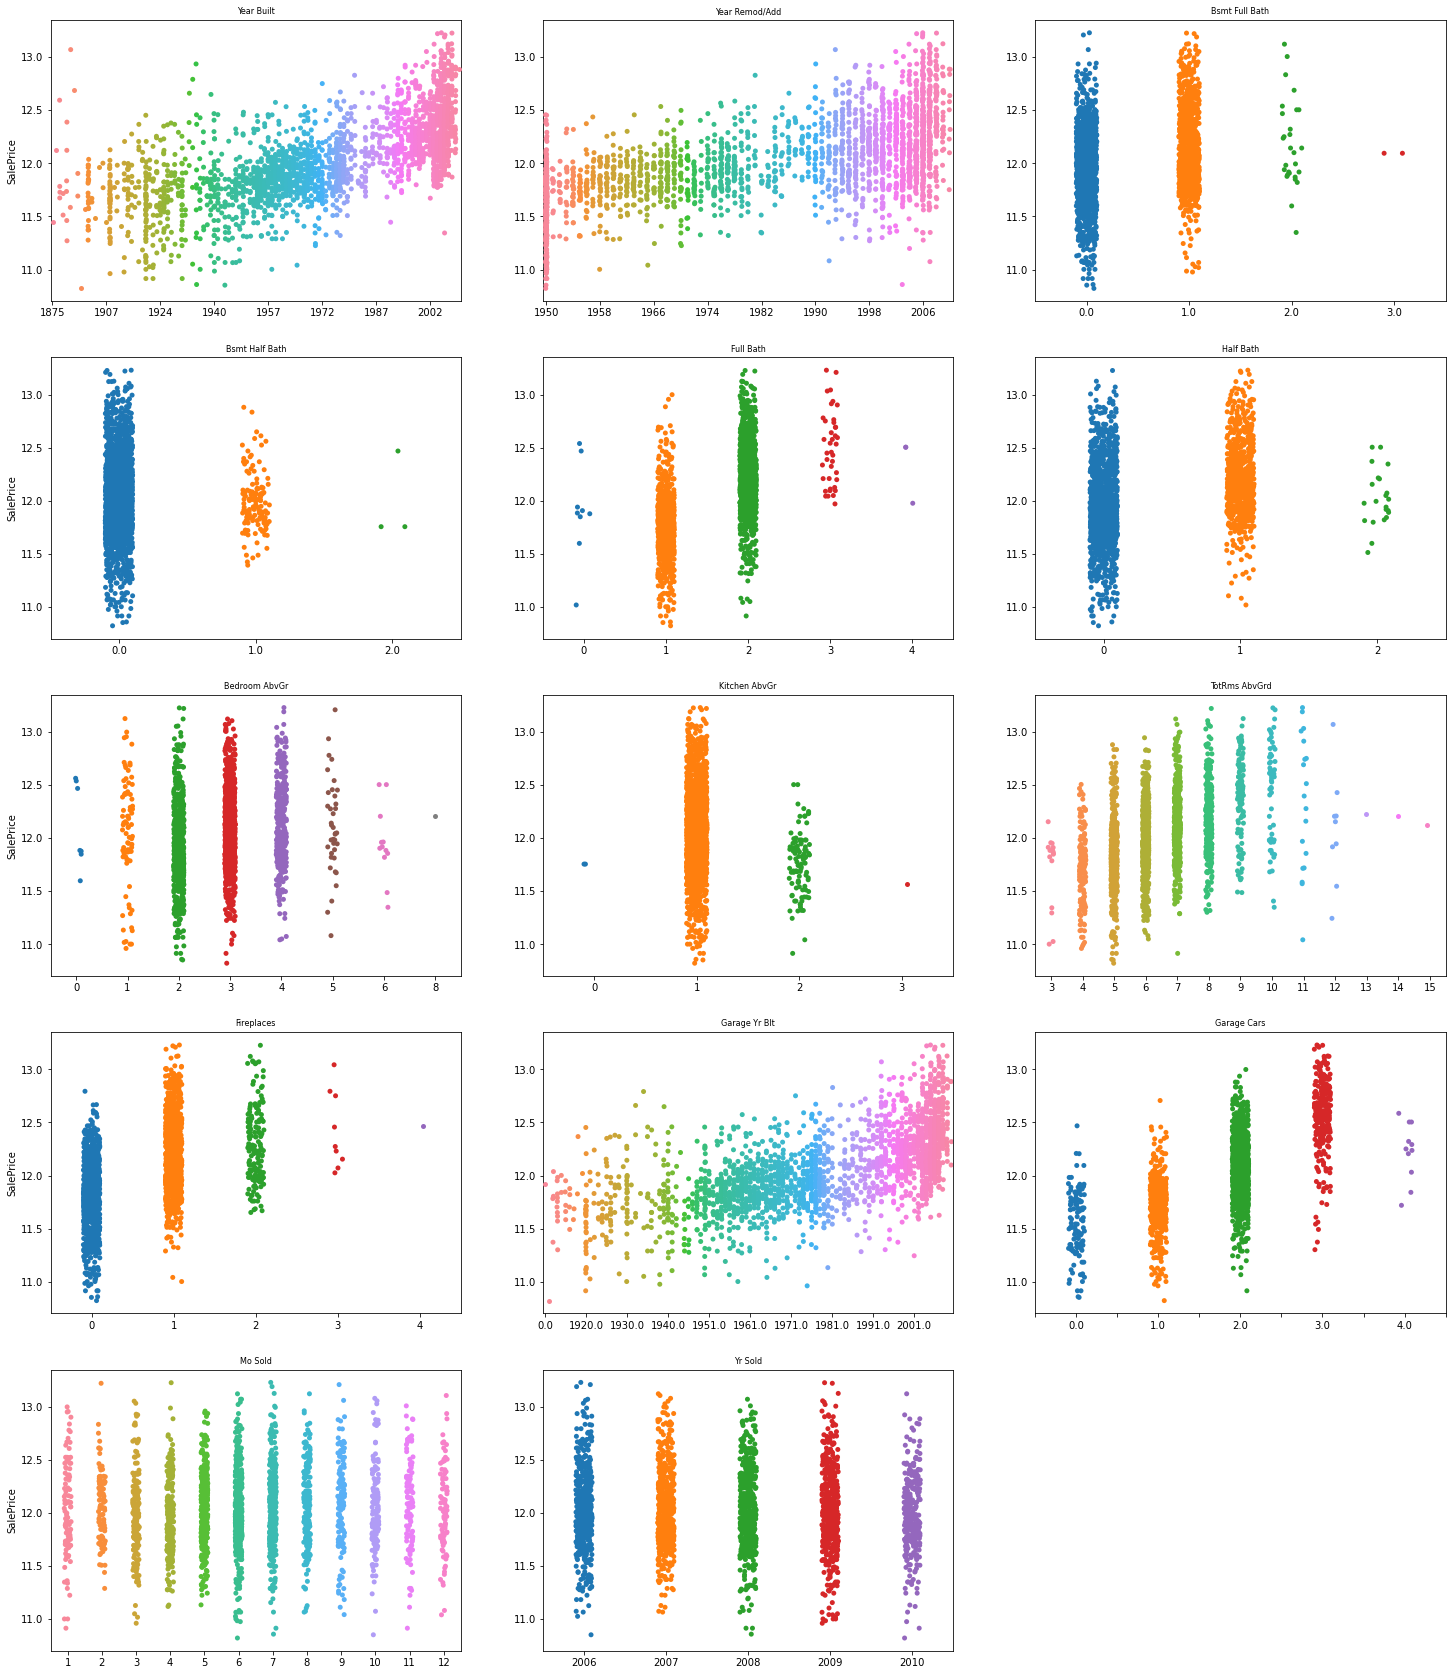

In [50]:
fig, axes = plt.subplots(
    5, 3,  gridspec_kw={"height_ratios": np.full(5, 1)}, figsize=(25,30)
)

i=0
for (feat, plot_col) in zip(
    df_d.columns, np.tile(np.arange(0,3,1),5)  # pairing feature with column in plot
    ):
        k=i
    
        ax = sns.stripplot(x=feat,y=np.log(df['SalePrice']),data= df, ax=axes[k, plot_col])
        axes[k, plot_col].set_title(feat, fontsize=8)
        if (k==0) & (plot_col< 2):
            max_yticks = 10
            xloc = plt.MaxNLocator(max_yticks)
            ax.xaxis.set_major_locator(xloc)
        if (k==3) & (plot_col> 0):
            max_yticks = 10
            xloc = plt.MaxNLocator(max_yticks)
            ax.xaxis.set_major_locator(xloc)

        if plot_col > 0 :
            axes[k, plot_col].set_ylabel("")
        if plot_col == 2:
            i+=1

for ax in axes.flatten():
    ax.set_xlabel("")
    
fig.delaxes(axes[4][2])
plt.show()

> The missing values for the garage, are the houses without garages, hence the missing values will be replaced with 0. 

In [51]:
df[df_d.columns] = df_d.fillna(0)

**Nominal Features**

> **Overview of the nominal features**

In [52]:
df_n = df[nominal].copy()
df_n.head()

,MS Zoning,Street,Alley,Land Contour,Lot Config,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Foundation,Heating,Central Air,Garage Type,Misc Feature,Sale Type,Sale Condition
0,RL,Pave,NaN,Lvl,Inside,Gilbert,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,None,PConc,GasA,Y,BuiltIn,NaN,WD,Normal
1,RL,Pave,NaN,Lvl,Corner,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,CBlock,GasA,Y,Attchd,NaN,WD,Normal
2,RM,Pave,NaN,Lvl,Inside,MeadowV,Norm,Norm,Twnhs,2Story,Gable,CompShg,CemntBd,CmentBd,BrkFace,CBlock,GasA,Y,Attchd,NaN,WD,Normal
3,RL,Pave,NaN,Lvl,Inside,NAmes,Norm,Norm,1Fam,1Story,Hip,CompShg,BrkFace,BrkFace,None,CBlock,GasA,Y,Attchd,NaN,WD,Normal
4,RM,Pave,NaN,Bnk,Inside,OldTown,Feedr,Norm,2fmCon,2.5Unf,Hip,CompShg,Wd Sdng,Wd Sdng,None,CBlock,GasA,N,Detchd,NaN,WD,Normal


> **The number of missing data**


In [53]:
df_n.isnull().sum()

MS Zoning            0
Street               0
Alley             2192
Land Contour         0
Lot Config           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type        27
Foundation           0
Heating              0
Central Air          0
Garage Type          0
Misc Feature      2264
Sale Type            0
Sale Condition       0
dtype: int64

> **Distribution of each feature by the houses sale price**

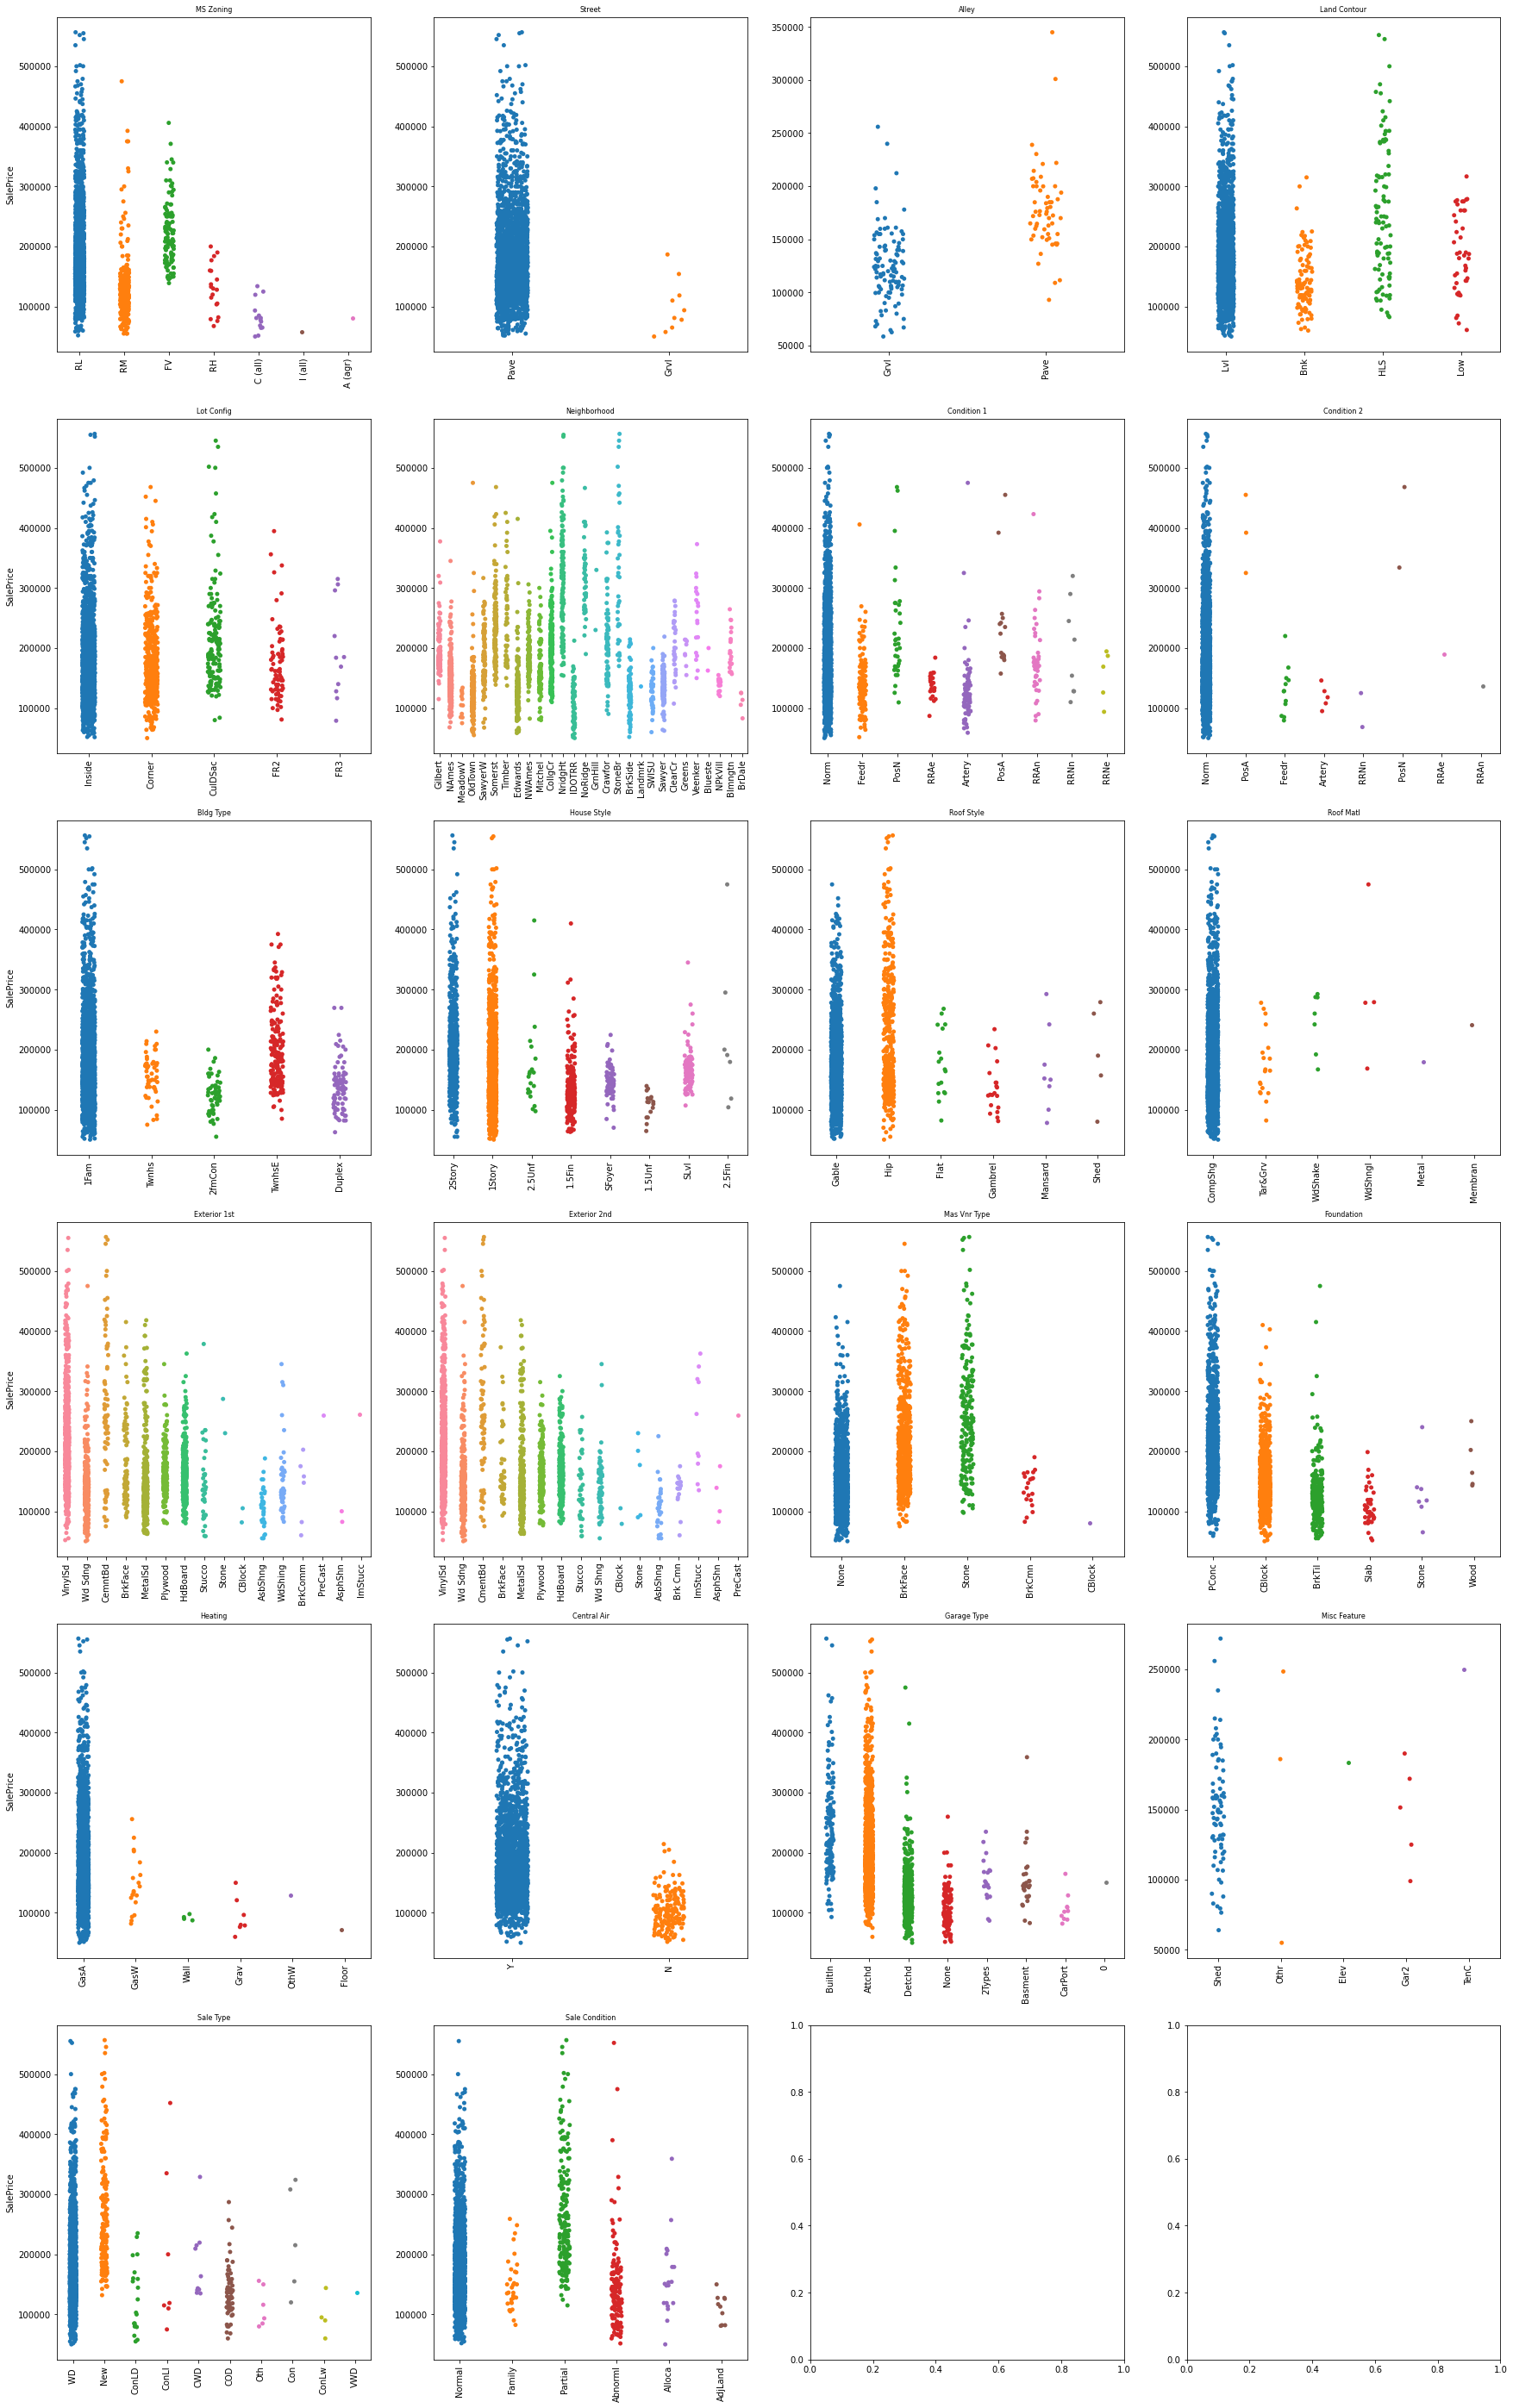

In [54]:
fig, axes = plt.subplots(
    6, 4,  gridspec_kw={"height_ratios": np.full(6, 1)}, figsize=(30,50)
)

i=0
for (feat, plot_col) in zip(
    df_n.columns, np.tile(np.arange(0,4,1),6)  # pairing feature with column in plot
    ):
        k=i
        ax = sns.stripplot(x=feat,y=df['SalePrice'],data= df, ax=axes[k, plot_col])
        ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
        axes[k, plot_col].set_title(feat, fontsize=8)
        if plot_col > 0 :
            axes[k, plot_col].set_ylabel("")
        if plot_col == 3:
            i+=1
    
for ax in axes.flatten():
    ax.set_xlabel("")

plt.show()

**Alley**

> The nan values in the alley feature represent houses without alley acces, and the same goes for . We will fill the nan values with 'None'. 

In [55]:
df['Alley'].fillna('None', inplace =True)

**Misc Feature**

In [56]:
df['Misc Feature'].fillna('None', inplace =True)

> **Shearch for naming incostancies**
>> No naming inconstancy

In [57]:
for col in df_n:
    print(col,' = ' ,df_n[col].unique())

MS Zoning  =  ['RL' 'RM' 'FV' 'RH' 'C (all)' 'I (all)' 'A (agr)']
Street  =  ['Pave' 'Grvl']
Alley  =  [nan 'Grvl' 'Pave']
Land Contour  =  ['Lvl' 'Bnk' 'HLS' 'Low']
Lot Config  =  ['Inside' 'Corner' 'CulDSac' 'FR2' 'FR3']
Neighborhood  =  ['Gilbert' 'NAmes' 'MeadowV' 'OldTown' 'SawyerW' 'Somerst' 'Timber'
 'Edwards' 'NWAmes' 'Mitchel' 'CollgCr' 'NridgHt' 'IDOTRR' 'NoRidge'
 'GrnHill' 'Crawfor' 'StoneBr' 'BrkSide' 'Landmrk' 'SWISU' 'Sawyer'
 'ClearCr' 'Greens' 'Veenker' 'Blueste' 'NPkVill' 'Blmngtn' 'BrDale']
Condition 1  =  ['Norm' 'Feedr' 'PosN' 'RRAe' 'Artery' 'PosA' 'RRAn' 'RRNn' 'RRNe']
Condition 2  =  ['Norm' 'PosA' 'Feedr' 'Artery' 'RRNn' 'PosN' 'RRAe' 'RRAn']
Bldg Type  =  ['1Fam' 'Twnhs' '2fmCon' 'TwnhsE' 'Duplex']
House Style  =  ['2Story' '1Story' '2.5Unf' '1.5Fin' 'SFoyer' '1.5Unf' 'SLvl' '2.5Fin']
Roof Style  =  ['Gable' 'Hip' 'Flat' 'Gambrel' 'Mansard' 'Shed']
Roof Matl  =  ['CompShg' 'Tar&Grv' 'WdShake' 'WdShngl' 'Metal' 'Membran']
Exterior 1st  =  ['VinylSd' 'Wd Sdng' '

**Ordinal Features**

> **Overview of the ordinal features**

In [58]:
df_o = df[ordinal].copy()
df_o.head()

,Lot Shape,Utilities,Land Slope,Overall Qual,Overall Cond,Exter Qual,Exter Cond,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin Type 2,Electrical,Kitchen Qual,Functional,Fireplace Qu,Garage Finish,Garage Qual,Garage Cond,Paved Drive,Pool QC,Fence,MS SubClass
0,IR1,AllPub,Gtl,7,5,Gd,TA,Gd,TA,No,GLQ,Unf,SBrkr,Gd,Typ,TA,Fin,TA,TA,Y,NaN,NaN,60
1,Reg,AllPub,Gtl,6,6,TA,TA,TA,TA,No,Unf,Unf,SBrkr,Gd,Typ,Gd,Unf,TA,TA,Y,NaN,NaN,20
2,Reg,AllPub,Gtl,4,5,TA,TA,TA,TA,No,Unf,Unf,SBrkr,TA,Typ,NaN,Unf,TA,TA,Y,NaN,NaN,160
3,IR1,AllPub,Gtl,5,5,TA,TA,TA,TA,No,Rec,Unf,SBrkr,Gd,Typ,Gd,RFn,TA,TA,Y,NaN,NaN,20
4,IR1,AllPub,Gtl,7,4,Fa,TA,TA,TA,No,Unf,Unf,FuseF,TA,Typ,Gd,Unf,TA,TA,N,NaN,MnPrv,190


> **The number of missing data**
>> The electrical missing value will be replaced with the most used electrical system.

>> For the Fireplace Qu, Pool QC and Pool QC, we will replace missign values with 'None'.

In [59]:
df_o.isnull().sum()

Lot Shape            0
Utilities            0
Land Slope           0
Overall Qual         0
Overall Cond         0
Exter Qual           0
Exter Cond           0
Bsmt Qual            0
Bsmt Cond            0
Bsmt Exposure        0
BsmtFin Type 1       0
BsmtFin Type 2       0
Electrical           1
Kitchen Qual         0
Functional           0
Fireplace Qu      1138
Garage Finish        0
Garage Qual          0
Garage Cond          0
Paved Drive          0
Pool QC           2344
Fence             1876
MS SubClass          0
dtype: int64

> **Distribution of each feature by the houses sale price**

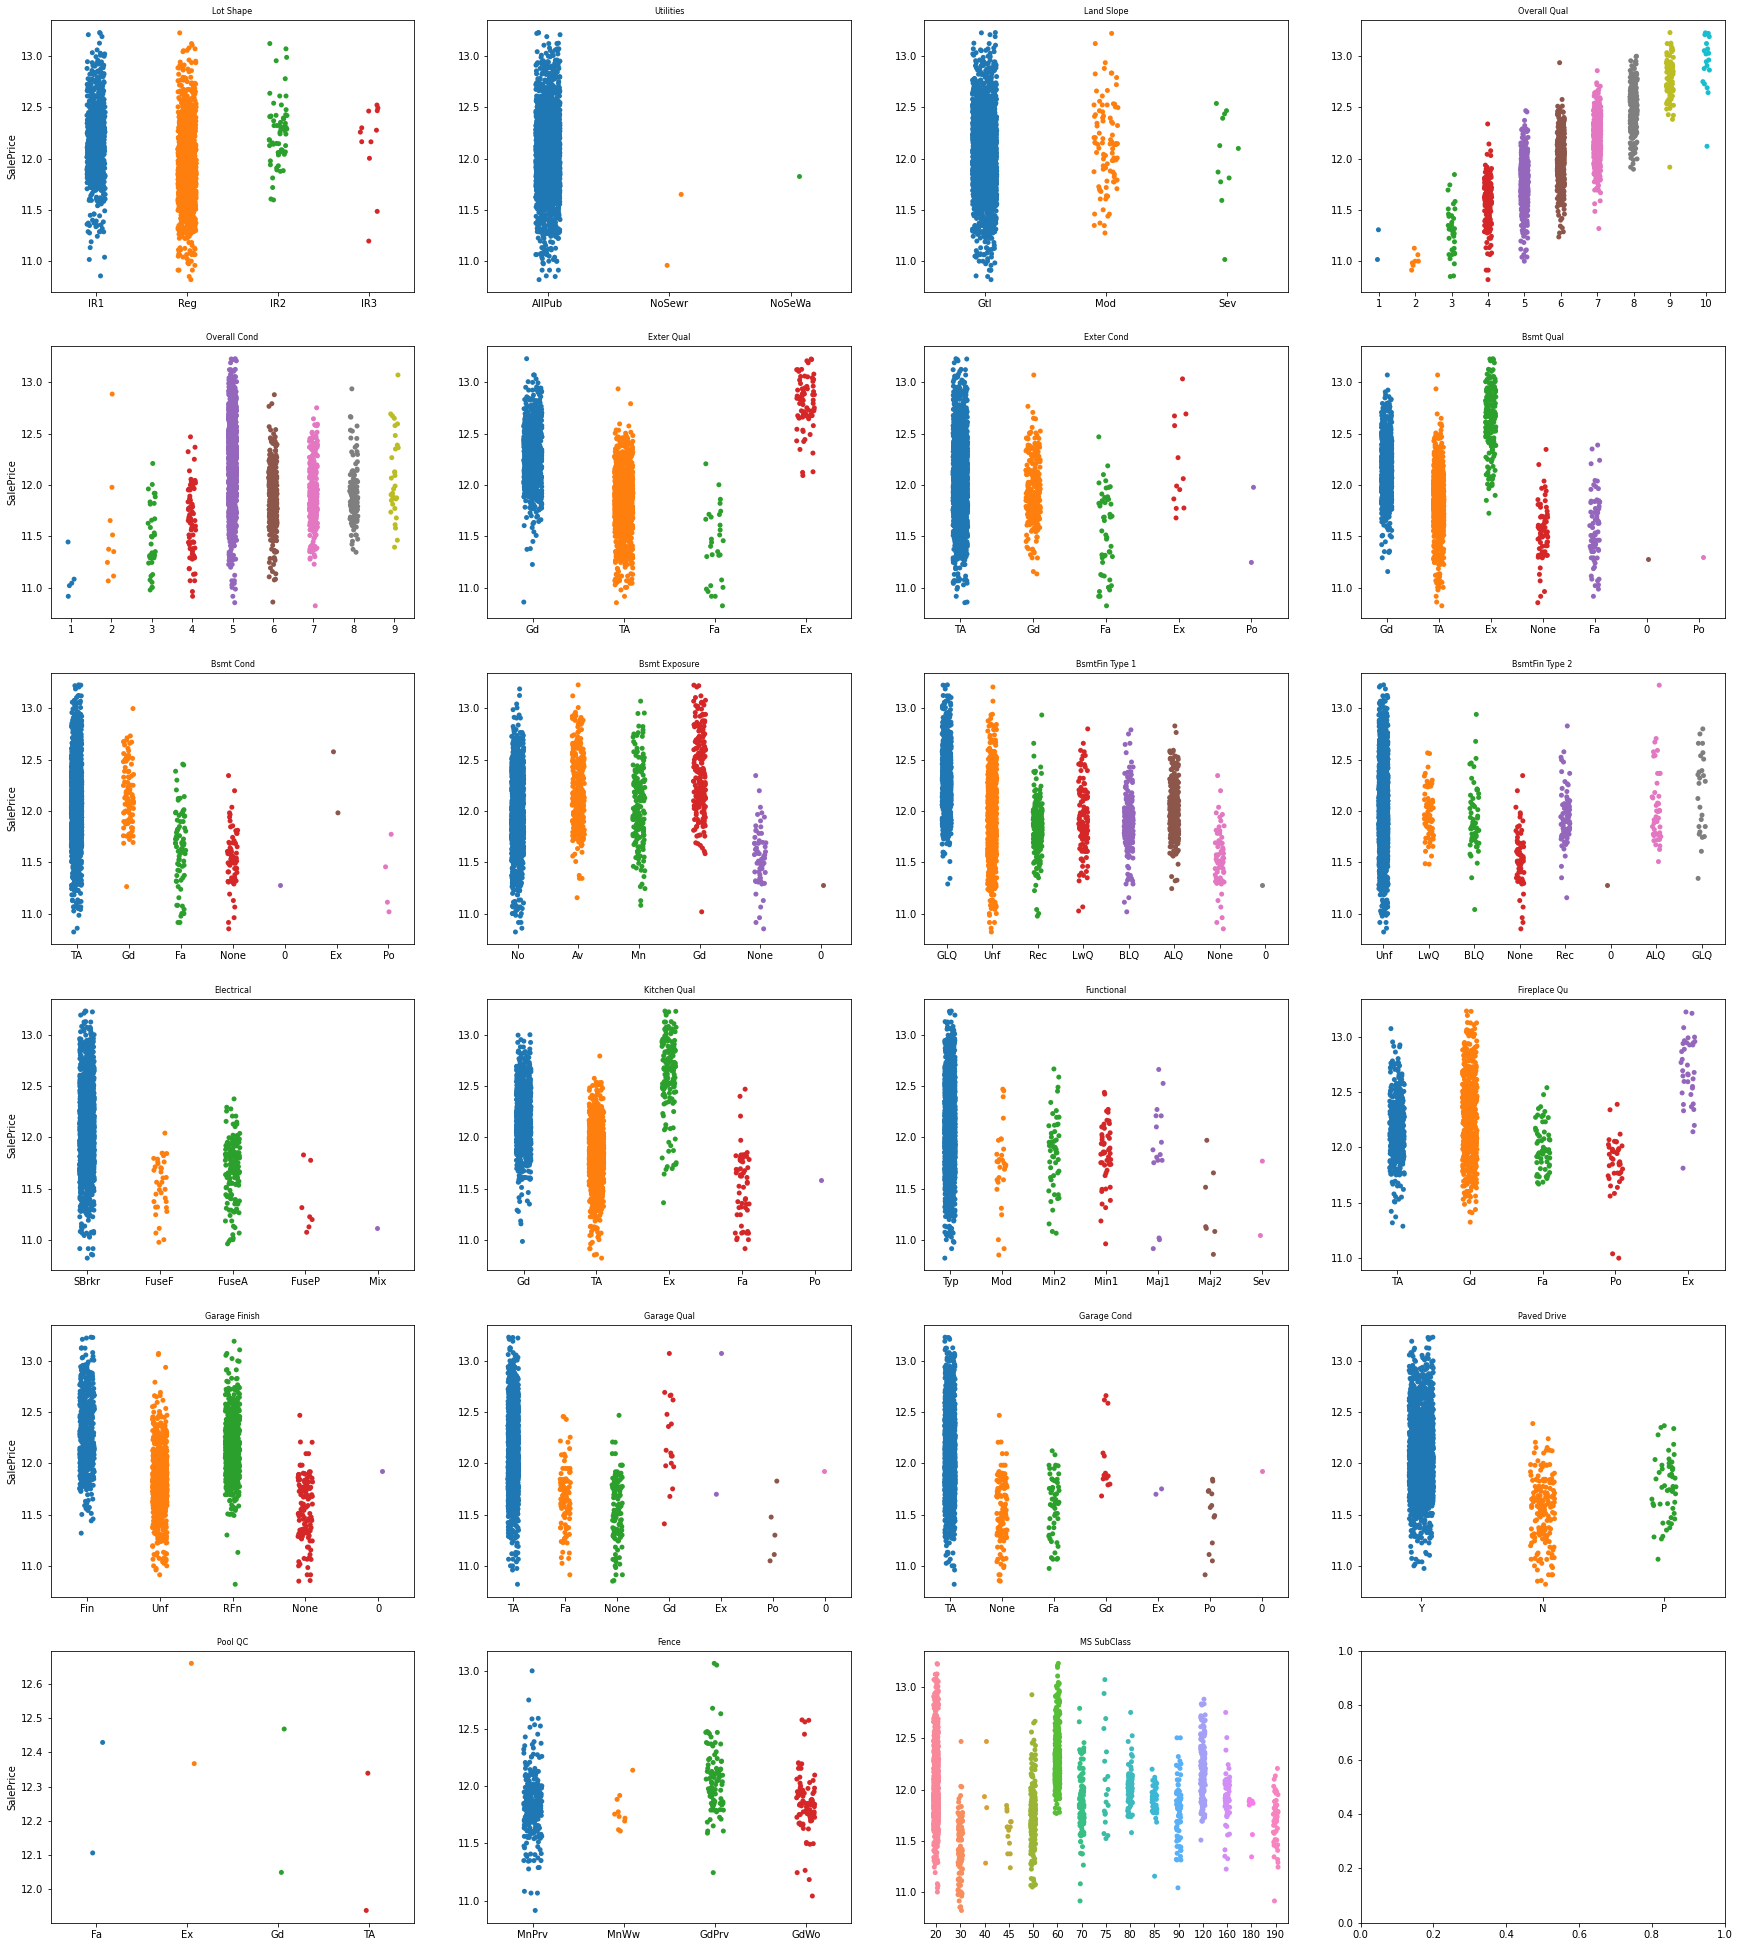

In [60]:
fig, axes = plt.subplots(
        6, 4,  gridspec_kw={"height_ratios": np.full(6, 1)}, figsize=(30,35)
)

i=0
for (feat, plot_col) in zip(
    df_o.columns, np.tile(np.arange(0,4,1),6)  # pairing feature with column in plot
    ):
        k=i
        ax = sns.stripplot(x=feat, y=np.log(df['SalePrice']),data= df, ax=axes[k, plot_col])
        axes[k, plot_col].set_title(feat, fontsize=8)
        if plot_col > 0 :
            axes[k, plot_col].set_ylabel("")
        if plot_col == 3:
            i+=1
    
for ax in axes.flatten():
    ax.set_xlabel("")

plt.show()

**Fireplace**

In [61]:
df['Fireplace Qu'].fillna('None', inplace =True)

**Pool**

In [62]:
df['Pool QC'].fillna('None', inplace =True)

**Frence**

In [63]:
df['Fence'].fillna('None', inplace =True)

**Electrical**

In [64]:
df['Electrical'].mode()

0    SBrkr
dtype: object

In [65]:
df['Electrical'].fillna('SBrkr', inplace =True)

**MS SubClass**

> The MS SubClass is built using three house features, which are: House Type, House Style, and Year Built. We could notice many inconstancies in these features, which will not be corrected individually but rather we will rebuild the feature using the other mentioned features.

In [66]:
df[(df['MS SubClass'] == 20)&(df['Year Built']<1946 )]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1339,20,RL,70.284464,9000,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Sawyer,Norm,Norm,1Fam,1Story,4,7,1945,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,TA,Slab,None,None,None,None,0.0,None,0.0,0.0,0.0,GasA,TA,N,FuseA,998,0,0,998,0.0,0.0,1,0,3,1,TA,5,Min2,0,None,2Types,1952.0,Unf,2.0,460.0,Fa,TA,Y,0.0,0,140.0,0,0,0,None,None,None,0,5,2007,WD,Normal,89500


In [67]:
df[(df['MS SubClass'] == 20)&(df['House Style'] !='1Story')]

,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
1091,20,RL,85.820453,14375,Pave,None,IR1,Lvl,NoSeWa,CulDSac,Gtl,Timber,Norm,Norm,1Fam,SLvl,6,6,1958,1958,Gable,CompShg,HdBoard,HdBoard,BrkFace,541.0,TA,TA,CBlock,TA,TA,No,GLQ,111.0,Rec,354.0,354.0,819.0,GasA,Gd,Y,FuseA,1344,0,0,1344,0.0,1.0,1,0,3,1,Gd,7,Typ,1,Gd,Basment,1958.0,RFn,2.0,525.0,TA,TA,Y,0.0,118,0.0,0,233,0,None,None,None,0,1,2009,COD,Abnorml,137500
1549,20,RL,78.000000,7800,Pave,None,Reg,Bnk,AllPub,Inside,Mod,Edwards,Norm,Norm,1Fam,2Story,5,8,1948,2002,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,Gd,CBlock,TA,Gd,No,GLQ,603.0,Unf,0.0,293.0,896.0,GasA,Ex,Y,SBrkr,1112,896,0,2008,1.0,0.0,3,0,3,1,Ex,8,Typ,0,None,Attchd,1948.0,Unf,1.0,230.0,TA,TA,Y,103.0,0,0.0,0,0,0,None,None,None,0,8,2006,WD,Normal,225000


In [68]:
Filter = (df['House Style'] == '1Story')&(df['Year Built']>= 1946)&(df['Bldg Type'] ==  '1Fam')&(df['MS SubClass']!= 40)
df.loc[Filter,'MS SubClass'] = 20

Filter = (df['House Style'] == '1Story')&(df['Year Built'] <= 1945)&(df['Bldg Type'] ==  '1Fam')&(df['MS SubClass'] != 40)
df.loc[Filter,'MS SubClass'] = 30

Filter = (df['House Style'] == '1.5Unf')&(df['Bldg Type'] == '1Fam')
df.loc[Filter,'MS SubClass'] = 45

Filter = (df['House Style'] == '1.5Fin')&(df['Bldg Type'] == '1Fam')
df.loc[Filter,'MS SubClass'] = 50

Filter = ((df['House Style'] == '2Story')&(df['Year Built'] >= 1946)&(df['Bldg Type'] ==  '1Fam'))
df.loc[Filter,'MS SubClass'] = 60

Filter = (df['House Style'] == '2Story')&(df['Year Built'] >= 1945)&(df['Bldg Type'] ==  '1Fam')
df.loc[Filter,'MS SubClass'] = 70

Filter = ((df['Bldg Type'] ==  '1Fam')&(df['House Style'] == '2.5Unf')|(df['House Style'] == '2.5Fin'))
df.loc[Filter,'MS SubClass'] = 75

Filter = ((df['Bldg Type'] ==  '1Fam')&(df['House Style'] == 'SLvl')|(df['House Style'] == '2.5Fin'))
df.loc[Filter,'MS SubClass'] = 80

Filter = (df['Bldg Type'] ==  '1Fam')&(df['House Style'] == 'SFoyer')
df.loc[Filter,'MS SubClass'] = 85

Filter = (df['Bldg Type'] == 'Duplex')
df.loc[Filter,'MS SubClass'] = 90

Filter = ((df['Bldg Type'] == 'Twnhs')|(df['Bldg Type'] == 'TwnhsE'))&(df['House Style'] == '1Story')&(df['Year Built'] >= 1946)
df.loc[Filter,'MS SubClass'] = 120

Filter = ((df['Bldg Type'] == 'Twnhs')|(df['Bldg Type'] == 'TwnhsE'))&((df['House Style'] == '1.5Fin')|(df['House Style'] == '1.5Unf'))
df.loc[Filter,'MS SubClass'] = 150

Filter = ((df['Bldg Type'] == 'Twnhs')|(df['Bldg Type'] == 'TwnhsE'))&(df['House Style'] == '2Story')&(df['Year Built'] >= 1946)
df.loc[Filter,'MS SubClass'] = 160

Filter = ((df['Bldg Type'] == 'Twnhs')|(df['Bldg Type'] == 'TwnhsE'))&((df['House Style'] == 'SLvl')|(df['House Style'] == 'SFoyer'))
df.loc[Filter,'MS SubClass'] = 180

Filter = df['Bldg Type'] == '2fmCon'
df.loc[Filter,'MS SubClass'] = 190

> **Print the unique values of each columns**

In [69]:
for col in df_o.columns:
    print(col,' = ' ,df_o[col].unique())

Lot Shape  =  ['IR1' 'Reg' 'IR2' 'IR3']
Utilities  =  ['AllPub' 'NoSewr' 'NoSeWa']
Land Slope  =  ['Gtl' 'Mod' 'Sev']
Overall Qual  =  [ 7  6  4  5  8  9 10  3  2  1]
Overall Cond  =  [5 6 4 8 7 9 3 2 1]
Exter Qual  =  ['Gd' 'TA' 'Fa' 'Ex']
Exter Cond  =  ['TA' 'Gd' 'Fa' 'Ex' 'Po']
Bsmt Qual  =  ['Gd' 'TA' 'Ex' 'None' 'Fa' 0 'Po']
Bsmt Cond  =  ['TA' 'Gd' 'Fa' 'None' 0 'Ex' 'Po']
Bsmt Exposure  =  ['No' 'Av' 'Mn' 'Gd' 'None' 0]
BsmtFin Type 1  =  ['GLQ' 'Unf' 'Rec' 'LwQ' 'BLQ' 'ALQ' 'None' 0]
BsmtFin Type 2  =  ['Unf' 'LwQ' 'BLQ' 'None' 'Rec' 0 'ALQ' 'GLQ']
Electrical  =  ['SBrkr' 'FuseF' 'FuseA' 'FuseP' nan 'Mix']
Kitchen Qual  =  ['Gd' 'TA' 'Ex' 'Fa' 'Po']
Functional  =  ['Typ' 'Mod' 'Min2' 'Min1' 'Maj1' 'Maj2' 'Sev']
Fireplace Qu  =  ['TA' 'Gd' nan 'Fa' 'Po' 'Ex']
Garage Finish  =  ['Fin' 'Unf' 'RFn' 'None' 0]
Garage Qual  =  ['TA' 'Fa' 'None' 'Gd' 'Ex' 'Po' 0]
Garage Cond  =  ['TA' 'None' 'Fa' 'Gd' 'Ex' 'Po' 0]
Paved Drive  =  ['Y' 'N' 'P']
Pool QC  =  [nan 'Fa' 'Ex' 'Gd' 'TA']
Fen

> Drop order and pid column:

**Feature Encoding**

> The ordinal features will be numerically coded using a scale from 1 to 10. Different scales are used, which depends on the feature variables count. 

>> Using the numerical scale will help us to pass information of order while having a low dimension matrix compared to one-hot encoding. 

In [70]:
df.replace(['ELO','No','Unf','Sev','Unf','IR3','Sal','N'], 1,inplace=True) # Very Poor
df.replace(['Po','Mn','LwQ','Maj2','FuseP'], 2,inplace=True) # Poor
df.replace(['Fa','Maj1','MnPrv','MnWw','FuseF'], 3,inplace=True) # Fair
df.replace(['NoSeWa','Rec','IR2'], 4,inplace=True) # Below Average
df.replace(['TA','Mod','RFn','Mix','Av','P'], 5,inplace=True) # Average
df.replace(['BLQ',], 6,inplace=True) # Above Average
df.replace(['NoSewr','Gd','Min2','IR1'], 7,inplace=True) # Good
df.replace(['ALQ','Min1','FuseA'], 8,inplace=True) # Very Good
df.replace(['Ex'], 9,inplace=True) # Excellent
df.replace(['AllPub','GLQ','Typ','Fin','GdPrv','GdWo','Gtl','SBrkr','Reg','Y'], 10,inplace=True) # Very Excellent

Feature Engineering:
---

> Work on a copy of cleaned dataframe.

In [71]:
df_d = df.copy()

> Most of the houses have ground living areas lower than 4000 sq. ft, and sell price as higher as ~600000. we will create a feature that penalizes the houses with high ground living area.

In [72]:
df_d['R0'] = [-100 if x >= 4000 else 0 for x in df_d['Gr Liv Area']]

> From the plot for the year built with respect to sale price we see that the prices increased linearly after 1946. Hence, we will create a column that indicates those houses.

In [73]:
df_d['R2'] = [1 if x >= 1946 else 0 for x in df_d['Year Built']]

> Apply logarithm to right-skewed distributed features.

In [74]:
log_col = ['SalePrice','Lot Frontage','Lot Area','1st Flr SF','Gr Liv Area']
df_d[log_col] = np.log(df_d[log_col])

Model fitting:
---

> Splitting the data into train validation data, and select features for Simple and intermediate model(Note, the results may vary depending on the split, because of the presence of one house with ground living area higher than 4000 sq.ft)

In [75]:
df_d = pd.get_dummies(df_d)

X= df_d.drop('SalePrice',axis=1)
y= df_d['SalePrice']

X_tr,X_val, y_tr,y_val = train_test_split(X,y, test_size=0.2)

# Standardize the continuous feature.
robust_c = RobustScaler()
X_tr.loc[:,continuous] = robust_c.fit_transform(X_tr.loc[:,continuous])
X_val.loc[:,continuous]  = robust_c.transform(X_val.loc[:,continuous] )

X_tr = X_tr.values
X_val = X_val.values
y_tr = y_tr.values
y_val = y_val.values

#Select best features
selector_im = SelectKBest(f_regression, k=20).fit(X_tr, y_tr)
X_tr_im = selector_im.transform(X_tr)
X_val_im = selector_im.transform(X_val)

selector_s= SelectKBest(f_regression, k=5).fit(X_tr, y_tr)
X_tr_s = selector_s.transform(X_tr)
X_val_s = selector_s.transform(X_val)

> Grid search using/Plot validation curve:
>> (codes had been taken from the course)

In [76]:
gs_results = []

for alpha in np.linspace(1, 100, num=100):
    # Create and fit ridge regression
    
    ridge = Ridge(alpha=alpha)
    ridge.fit(X_tr, y_tr)

    # Save model and its performance on train/test sets
    gs_results.append({
        'alpha': alpha,
        'train_mae': mae(np.expm1(y_tr), np.expm1(ridge.predict(X_tr))),
        'validation_mae': mae(np.expm1(y_val), np.expm1(ridge.predict(X_val))),
    })
    
gs_results = pd.DataFrame(gs_results)
gs_results.head()

,alpha,train_mae,validation_mae
0,1.0,10985.945315,12380.408880
1,2.0,11064.058869,12273.960575
2,3.0,11113.744721,12202.286001
3,4.0,11151.024248,12155.247168
4,5.0,11182.296639,12116.219007


> Plot the validation curve.

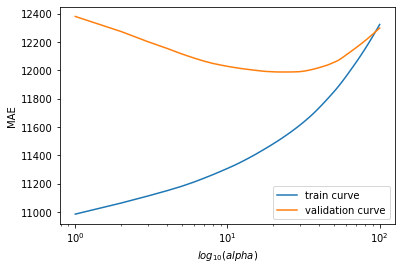

In [77]:
plt.semilogx(gs_results['alpha'], gs_results['train_mae'], label='train curve')
plt.semilogx(gs_results['alpha'], gs_results['validation_mae'], label='validation curve')
plt.xlabel('$log_{10}(alpha)$')
plt.ylabel('MAE')
plt.legend()
plt.show()

> Print the best alpha parameter.

In [78]:
best_result = gs_results.loc[gs_results.validation_mae.idxmin()]

# Print the details
print('Best alpha:', best_result.alpha)
print('Test MAE: {:,.0f}$'.format(best_result.validation_mae))

Best alpha: 22.0
Test MAE: 11,989$


**Complex model**

In [79]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error
from sklearn import preprocessing

# Ridge regression
ridge_c = Ridge(alpha=best_result.alpha)
ridge_c.fit(X_tr, y_tr)

# Compute predictions
y_pred = ridge_c.predict(X_val)

mae_baseline= mae(np.expm1(y_val), np.full(y_val.shape, np.expm1(np.median(y_val))))
rsme_c = mean_squared_error(np.expm1(y_val),np.expm1(y_pred), squared=False)
mae_c= mae(np.expm1(y_val), np.expm1(y_pred))
print('MAE Baseline: {:,.0f}$'.format(mae_baseline))
print('My complex model has an MAE of {:,.0f}$'.format(mae_c))
print('My complex model has an RSME of {:,.0f}'.format(rsme_c))
print('My complex model has an R2 of', ridge_c.score(X_val,y_val))

MAE Baseline: 51,620$
My complex model has an MAE of 11,989$
My complex model has an RSME of 18,451
My complex model has an R2 of 0.926458097042692


**Intermediate model**

In [80]:
# Ridge regression

ridge_im = Ridge()
ridge_im.fit(X_tr_im, y_tr)

# Compute predictions
y_pred_im = ridge_im.predict(X_val_im)

mae_im= mae(np.expm1(y_val), np.expm1(y_pred_im))
print('MAE Baseline: {:,.0f}$'.format(mae_baseline))
print('My intermediate model has an MAE of {:,.0f}$'.format(mae_im))

MAE Baseline: 51,620$
My intermediate model has an MAE of 16,268$


**Simple model**

In [81]:
# Ridge regression

ridge_s = Ridge()
ridge_s.fit(X_tr_s, y_tr)

# Compute predictions
y_pred_s = ridge_s.predict(X_val_s)

mae_s= mae(np.expm1(y_val), np.expm1(y_pred_s))
print('MAE Baseline: {:,.0f}$'.format(mae_baseline))
print('My simple model has an MAE of {:,.0f}$'.format(mae_s))

MAE Baseline: 51,620$
My simple model has an MAE of 19,686$


> MAE resuts comparaison:

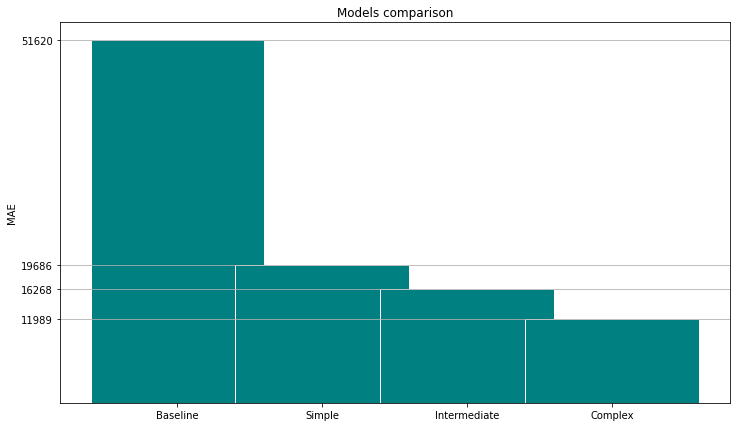

In [82]:
plt.figure(figsize=(12,7))
plt.bar(['Baseline','Simple','Intermediate','Complex'],[mae_baseline,mae_s,mae_im,mae_c],width = 1.2, color='teal',edgecolor='white')
plt.title('Models comparison')
plt.ylabel('MAE')
plt.yticks([mae_baseline,mae_s,mae_im,mae_c])
plt.grid(True,axis='y')
plt.show()

Test Set:
---

> All previous operations to clean the data will be applied to the training set assuming that they come from the same data set and they have the same patterns.
>> We define function implementing of the above transformation.

In [83]:
def transform_df(df):
    
    y_lf = df['Lot Frontage'].dropna(axis=0)
    x_lf = np.log(df.loc[y_lf.index,'Lot Area'])
    coef = np.polyfit(x_lf, y_lf,1)
    df.loc[(df['Lot Frontage'] > 300), 'Lot Frontage'] = np.polyval(coef,np.log(df[df['Lot Frontage']>300]['Lot Area']))
    ylfnull = df['Lot Frontage'][df['Lot Frontage'].isnull()]
    df['Lot Frontage'].fillna(pd.Series(np.polyval(coef,np.log(df['Lot Area'][ylfnull.index])), index = ylfnull.index), inplace=True)
    
    df.loc[(df['Wood Deck SF'] > 1400),'Wood Deck SF'] = df['Wood Deck SF'].mean()
    df.loc[(df['Enclosed Porch'] > 1000),'Enclosed Porch'] = df['Enclosed Porch'].mean()
    
    df.loc[(df['Mas Vnr Area'] == 0)&(df['Mas Vnr Type'] != 'None'),'Mas Vnr Type'] = 'None'
    df.loc[(df['Mas Vnr Area'] > 0)&(df['Mas Vnr Type'] == 'None'),'Mas Vnr Type'] = df['Mas Vnr Type'].mode()
    df.loc[df['Mas Vnr Area'].isnull(),'Mas Vnr Area'] = 0
    df.loc[df['Mas Vnr Area'].isnull(),'Mas Vnr Type'] = 'None'
    
    df.loc[df['Bsmt Unf SF'].isnull(),df.columns.str.contains('Bsmt')] = 0
    df.loc[df['Bsmt Unf SF'].isnull(),['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2']] = 'None'
    df.loc[(df['Bsmt Exposure'].isnull())&(df['Bsmt Qual'].notnull()), 'Bsmt Exposure'] = 'No'
    df.loc[(df['BsmtFin Type 2'].isnull())&(df['Total Bsmt SF']!=0), 'BsmtFin Type 2'] = 'Unf'
    bsmt = ['Bsmt Qual','Bsmt Cond','Bsmt Exposure','BsmtFin Type 1','BsmtFin Type 2']
    df.loc[:,bsmt]=df.loc[:,bsmt].fillna('None')

    df.loc[df['Garage Area'].isnull(),df.columns.str.contains('Garage')] = 0
    df.loc[df['Garage Area'].isnull(),['Garage Type','Garage Finish','Garage Qual','Garage Cond']] = 'None'
    Filter = ((df['Garage Type'].notnull())&(df['Garage Yr Blt'].isnull()))
    df.loc[Filter,'Garage Yr Blt'] = df.loc[Filter,'Year Built']
    df.loc[Filter,'Garage Finish'] = list(df['Garage Finish'].mode())
    df.loc[Filter,'Garage Qual'] = list(df['Garage Qual'].mode())
    df.loc[Filter,'Garage Cond'] = list(df['Garage Cond'].mode())
    df.loc[(df['Garage Yr Blt'] > 2010),'Garage Yr Blt'] = df.loc[(df['Garage Yr Blt'] > 2010),'Year Built']
    garage = ['Garage Type','Garage Finish','Garage Qual','Garage Cond']
    df.loc[:,garage]=df.loc[:,garage].fillna('None')
    
    df_d = df[discrete].copy()
    df[df_d.columns] = df_d.fillna(0)
    
    df['Alley'].fillna('None', inplace =True)
    df['Misc Feature'].fillna('None', inplace =True)
    df['Fireplace Qu'].fillna('None', inplace =True)
    df['Pool QC'].fillna('None', inplace =True)
    df['Fence'].fillna('None', inplace =True)
    df['Electrical'].fillna('SBrkr', inplace =True)
    
    Filter = (df['House Style'] == '1Story')&(df['Year Built']>= 1946)&(df['Bldg Type'] ==  '1Fam')&(df['MS SubClass']!= 40)
    df.loc[Filter,'MS SubClass'] = 20
    Filter = (df['House Style'] == '1Story')&(df['Year Built'] <= 1945)&(df['Bldg Type'] ==  '1Fam')&(df['MS SubClass'] != 40)
    df.loc[Filter,'MS SubClass'] = 30
    Filter = (df['House Style'] == '1.5Unf')&(df['Bldg Type'] == '1Fam')
    df.loc[Filter,'MS SubClass'] = 45
    Filter = (df['House Style'] == '1.5Fin')&(df['Bldg Type'] == '1Fam')
    df.loc[Filter,'MS SubClass'] = 50
    Filter = ((df['House Style'] == '2Story')&(df['Year Built'] >= 1946)&(df['Bldg Type'] ==  '1Fam'))
    df.loc[Filter,'MS SubClass'] = 60
    Filter = (df['House Style'] == '2Story')&(df['Year Built'] >= 1945)&(df['Bldg Type'] ==  '1Fam')
    df.loc[Filter,'MS SubClass'] = 70
    Filter = ((df['Bldg Type'] ==  '1Fam')&(df['House Style'] == '2.5Unf')|(df['House Style'] == '2.5Fin'))
    df.loc[Filter,'MS SubClass'] = 75
    Filter = ((df['Bldg Type'] ==  '1Fam')&(df['House Style'] == 'SLvl')|(df['House Style'] == '2.5Fin'))
    df.loc[Filter,'MS SubClass'] = 80
    Filter = (df['Bldg Type'] ==  '1Fam')&(df['House Style'] == 'SFoyer')
    df.loc[Filter,'MS SubClass'] = 85
    Filter = (df['Bldg Type'] == 'Duplex')
    df.loc[Filter,'MS SubClass'] = 90
    Filter = ((df['Bldg Type'] == 'Twnhs')|(df['Bldg Type'] == 'TwnhsE'))&(df['House Style'] == '1Story')&(df['Year Built'] >= 1946)
    df.loc[Filter,'MS SubClass'] = 120
    Filter = ((df['Bldg Type'] == 'Twnhs')|(df['Bldg Type'] == 'TwnhsE'))&((df['House Style'] == '1.5Fin')|(df['House Style'] == '1.5Unf'))
    df.loc[Filter,'MS SubClass'] = 150
    Filter = ((df['Bldg Type'] == 'Twnhs')|(df['Bldg Type'] == 'TwnhsE'))&(df['House Style'] == '2Story')&(df['Year Built'] >= 1946)
    df.loc[Filter,'MS SubClass'] = 160
    Filter = ((df['Bldg Type'] == 'Twnhs')|(df['Bldg Type'] == 'TwnhsE'))&((df['House Style'] == 'SLvl')|(df['House Style'] == 'SFoyer'))
    df.loc[Filter,'MS SubClass'] = 180
    Filter = df['Bldg Type'] == '2fmCon'
    df.loc[Filter,'MS SubClass'] = 190
    
    df.replace(['ELO','No','Unf','Sev','Unf','IR3','Sal','N'], 1,inplace=True) # Very Poor
    df.replace(['Po','Mn','LwQ','Maj2','FuseP'], 2,inplace=True) # Poor
    df.replace(['Fa','Maj1','MnPrv','MnWw','FuseF'], 3,inplace=True) # Fair
    df.replace(['NoSeWa','Rec','IR2'], 4,inplace=True) # Below Average
    df.replace(['TA','Mod','RFn','Mix','Av','P'], 5,inplace=True) # Average
    df.replace(['BLQ',], 6,inplace=True) # Above Average
    df.replace(['NoSewr','Gd','Min2','IR1'], 7,inplace=True) # Good
    df.replace(['ALQ','Min1','FuseA'], 8,inplace=True) # Very Good
    df.replace(['Ex'], 9,inplace=True) # Excellent
    df.replace(['AllPub','GLQ','Typ','Fin','GdPrv','GdWo','Gtl','SBrkr','Reg','Y'], 10,inplace=True) # Very Excellent

        # Feaauture Engineering
    df['R0'] = [-100 if x >= 4000 else 0 for x in df['Gr Liv Area']]
    df['R2'] = [1 if x >= 1946 else 0 for x in df['Year Built']]
    
    log_col = ['Lot Frontage','Lot Area','1st Flr SF','Gr Liv Area']
    df[log_col] = np.log1p(df[log_col])
    
    df.loc[:,continuous] = robust_c.transform(df.loc[:,continuous])
    
    return df

> Importing the test set, and clean it: 

In [84]:
df_test = pd.read_csv('house-prices-test.csv')
df_test = df_test.drop(['Order','PID'],axis= 1)
df_test = transform_df(df_test)
df_test = pd.get_dummies(df_test)
df_test = df_test.reindex(columns= df_d.drop('SalePrice',axis=1).columns,fill_value=0)

> Predict the house price for the three models 

In [85]:
X_test = df_test.values
X_test_s= selector_s.transform(X_test)
X_test_im = selector_im.transform(X_test)

y_pred_c = ridge_c.predict(X_test)
y_pred_im = ridge_im.predict(X_test_im)
y_pred_s = ridge_s.predict(X_test_s)

> Export the results 

In [86]:
result_c= pd.read_csv('predictions-example.csv')
result_im= pd.read_csv('predictions-example.csv')
result_s= pd.read_csv('predictions-example.csv')

result_c['SalePrice'] = np.expm1(y_pred_c)
result_im['SalePrice'] = np.expm1(y_pred_im)
result_s['SalePrice'] = np.expm1(y_pred_s)

result_s.to_csv('predictions-simple-model.csv', index=False)
result_im.to_csv('predictions-intermediate-model.csv', index=False)
result_c.to_csv('predictions-complex-model.csv', index=False)